In [620]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score,f1_score,mean_absolute_error,mean_squared_error
from sklearn.impute import SimpleImputer
import xgboost
from sklearn import svm
from xgboost import XGBClassifier, plot_importance
import pickle as pk
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


In [682]:
diabetesdataurl='app\\static\\Datasets\\diabetes.csv'

diabetesdata= pd.read_csv(diabetesdataurl)

In [683]:
# diabetesdata[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetesdata[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
# diabetesdata.dropna(inplace=True,axis=0)
diabetesdata[['Glucose','BloodPressure']] = diabetesdata[['Glucose','BloodPressure']].replace(0,np.NaN)
diabetesdata.dropna(inplace=True,axis=0)
# diabetesdata['BloodPressure']=diabetesdata['BloodPressure'].replace(0,np.median(diabetesdata['BloodPressure']))
diabetesdata['SkinThickness']=diabetesdata['SkinThickness'].replace(0,np.median(diabetesdata['SkinThickness']))
diabetesdata['Insulin']=diabetesdata['Insulin'].replace(0,np.median(diabetesdata['Insulin']))
diabetesdata['BMI']=diabetesdata['BMI'].replace(0,np.mean(diabetesdata['BMI']))

In [684]:
diabetesdata.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [685]:
diabetesdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,3.862637,121.873626,72.438187,27.784341,106.240385,32.466147,0.476518,33.394231,0.343407
std,3.363422,30.679207,12.386109,9.284821,102.456868,6.869976,0.334851,11.849692,0.475172
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,24.000000,48.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.250000,80.000000,33.000000,130.000000,36.600000,0.629500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [686]:
diabetesdata.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [687]:
X=diabetesdata.drop(['Outcome','DiabetesPedigreeFunction', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction'],axis=1)
X

,Pregnancies,Glucose,BloodPressure,BMI,Age
0,6,148.0,72.0,33.6,50
1,1,85.0,66.0,26.6,31
2,8,183.0,64.0,23.3,32
3,1,89.0,66.0,28.1,21
4,0,137.0,40.0,43.1,33
...,...,...,...,...,...
763,10,101.0,76.0,32.9,63
764,2,122.0,70.0,36.8,27
765,5,121.0,72.0,26.2,30
766,1,126.0,60.0,30.1,47


In [688]:
# X.replace(0,X.mean(), inplace=True)

In [689]:
X

,Pregnancies,Glucose,BloodPressure,BMI,Age
0,6,148.0,72.0,33.6,50
1,1,85.0,66.0,26.6,31
2,8,183.0,64.0,23.3,32
3,1,89.0,66.0,28.1,21
4,0,137.0,40.0,43.1,33
...,...,...,...,...,...
763,10,101.0,76.0,32.9,63
764,2,122.0,70.0,36.8,27
765,5,121.0,72.0,26.2,30
766,1,126.0,60.0,30.1,47


In [690]:
Y=diabetesdata['Outcome']
# X=np.array(X)

<AxesSubplot:>

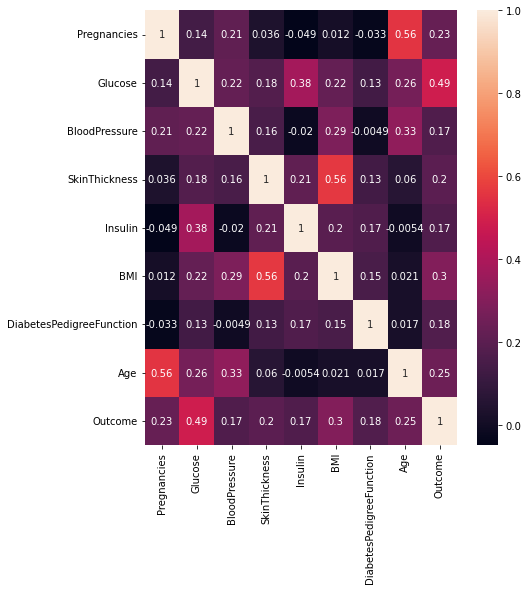

In [691]:
plt.figure(figsize=(7,8))
sns.heatmap(diabetesdata.corr(),annot=True)

# Chi Square Test

In [692]:
from sklearn.feature_selection import chi2
f1pvalues=chi2(X,Y)
f1pvalues

(array([ 110.20656719, 1334.32711346,   44.01664155,   94.28527579,
         183.68633378]),
 array([8.82936000e-026, 3.92222785e-292, 3.25595816e-011, 2.73174801e-022,
        7.59605459e-042]))

In [693]:
np.sort(f1pvalues[0])
# the higher the f score value the more important the feature

array([  44.01664155,   94.28527579,  110.20656719,  183.68633378,
       1334.32711346])

In [694]:
np.sort(f1pvalues[1])
# the lower the p value the more important the feature

array([3.92222785e-292, 7.59605459e-042, 8.82936000e-026, 2.73174801e-022,
       3.25595816e-011])

In [695]:
pd.Series(f1pvalues[1], index=X.columns).sort_values()

Glucose          3.922228e-292
Age               7.596055e-42
Pregnancies       8.829360e-26
BMI               2.731748e-22
BloodPressure     3.255958e-11
dtype: float64

In [696]:
pd.Series(f1pvalues[0], index=X.columns).sort_values()

BloodPressure      44.016642
BMI                94.285276
Pregnancies       110.206567
Age               183.686334
Glucose          1334.327113
dtype: float64

In [697]:
from sklearn.feature_selection import mutual_info_classif,SelectKBest
mutual_info=mutual_info_classif(X,Y)
mutual_info=pd.Series(mutual_info,X.columns)
mutual_info.sort_values()

BloodPressure    0.004976
Pregnancies      0.038286
Age              0.065147
BMI              0.073363
Glucose          0.118036
dtype: float64

In [698]:
sel_5=SelectKBest(mutual_info_classif,k=5)
sel_5.fit(X,Y)
X.columns[sel_5.get_support()]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'], dtype='object')

In [738]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[ 0.63590961,  0.85218423, -0.0354016 ,  0.16515817,  1.4023306 ],
       [-0.85169385, -1.20273572, -0.52014826, -0.85446881, -0.20218895],
       [ 1.23095099,  1.99380643, -0.68173048, -1.3351501 , -0.11774055],
       ...,
       [ 0.33838892, -0.02849575, -0.0354016 , -0.91273321, -0.28663735],
       [-0.85169385,  0.13459313, -1.00489491, -0.34465532,  1.1489854 ],
       [-0.85169385, -0.94179351, -0.19698382, -0.30095702, -0.87777613]])

In [739]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [746]:
# xgb_cls=xgboost.XGBClassifier(learning_rate =0.0001,
#  n_estimators=1000,
 
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# classifier=LogisticRegression()
# classifier=RandomForestClassifier(n_estimators=2,criterion="entropy")
classifier=svm.SVC(probability=True,kernel='linear')
# classifier=RandomForestClassifier(n_estimators=300,max_features='sqrt',bootstrap=True)
# classifier=MLPClassifier(hidden_layer_sizes=(64,64))
classifier.fit(X_train,Y_train)
pred=classifier.predict(X_train)
preds=classifier.predict(X_test)

In [747]:
trainaccuracy=accuracy_score(Y_train,pred)
f1score= f1_score(Y_test,preds, average=None)
trainaccuracy, f1score

(0.7628865979381443, array([0.85858586, 0.70212766]))

In [748]:
preds

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [749]:
Y_test

693    1
273    0
551    0
285    0
695    1
      ..
580    1
597    0
736    0
419    1
745    0
Name: Outcome, Length: 146, dtype: int64

In [750]:
testaccuracy=accuracy_score(Y_test,preds)*100
testaccuracy

80.82191780821918

In [751]:
f1score=f1_score(Y_test,preds)
mae=mean_squared_error(Y_test,preds)
print(f1score,mae)

0.702127659574468 0.1917808219178082


In [756]:
sample1=[[1,89,66,23,94,28.1,21]]
sample1=[[0,137,40,35,168,43.1,2.288,33,1]]
# sample1=[5,116,74,0,0,25.6,30]
# sample1=[[6,148,72,35,0,33.6,50]]
# pregnanciesno=1
# glucose=89
# bmi=28.1
# insulin=94
# Age=21
# bloodpressure=66
# SkinThickness=23
# pedigree=0.167
pregnanciesno=10
glucose=137
bmi=43.1
insulin=168
Age=33
bloodpressure=40
SkinThickness=35
pedigree=2.288
features=[pregnanciesno,glucose,bloodpressure,bmi,Age]
features=np.array(features)
features=features.reshape(1,-1)
features=scaler.transform(features)
predictionvalue=classifier.predict(features)
prediction=classifier.predict_proba(features)
print(predictionvalue, prediction)
if predictionvalue==1:
    print ('You have diabetes')
else:
    print ('No diabetes')

[1] [[0.20077698 0.79922302]]
You have diabetes


C:\Users\VICKFURY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
ml= "diabetespredmodelusingxgboost.pkl"
# ml= "diabetespredmodelusingxgboost.json"
md=pk.dump(classifier,open(ml,'wb'))
# import joblib as jb
# classifier.save_model(ml)
# jb.dump(classifier,ml)

In [ ]:
# model =pk.load(open(ml,'rb'))
# print(model)
# # xgb_cls.load_model(ml)
# # model=jb.load(ml)
# sample1=[5,116,74,0,0,25.6,30]
# sample1=[6,148,72,35,0,33.6,50]
# sample1=np.array(sample1)
# sample1=sample1.reshape(-1,1)
# sample1=scaler.fit_transform(sample1)
# sample1=sample1.reshape(1,-1)
# print(sample1)
# model.predict(sample1)


# Insulin Threshold identification

In [706]:
x=diabetesdata[(diabetesdata.Insulin<=100) & (diabetesdata.Outcome==0)]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29,48,26.6,0.351,31,0
3,1,89.0,66.0,23,94,28.1,0.167,21,0
5,5,116.0,74.0,24,48,25.6,0.201,30,0
10,4,110.0,92.0,24,48,37.6,0.191,30,0
12,10,139.0,80.0,24,48,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
758,1,106.0,76.0,24,48,37.5,0.197,26,0
760,2,88.0,58.0,26,16,28.4,0.766,22,0
762,9,89.0,62.0,24,48,22.5,0.142,33,0
764,2,122.0,70.0,27,48,36.8,0.340,27,0


In [707]:
np.sort(diabetesdata['Insulin'].unique())

array([ 14,  15,  16,  18,  22,  23,  25,  29,  32,  36,  37,  38,  40,
        41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,  68,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,  99,
       100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122, 125,
       126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146, 148,
       150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170, 171,
       175, 176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192, 193,
       194, 196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230, 231,
       235, 237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272, 274,
       275, 277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318, 321,
       325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402, 415,
       440, 465, 474, 478, 480, 485, 495, 510, 540, 543, 545, 57

In [708]:
maxthreshold=diabetesdata['Insulin'].quantile(0.95)
maxthreshold

302.5999999999999

In [709]:
diabetesdata[(diabetesdata['Insulin']>=maxthreshold) & (diabetesdata['Outcome']==1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45,543,30.5,0.158,53,1
13,1,189.0,60.0,23,846,30.1,0.398,59,1
56,7,187.0,68.0,39,304,37.7,0.254,41,1
111,8,155.0,62.0,26,495,34.0,0.543,46,1
186,8,181.0,68.0,36,495,30.1,0.615,60,1
199,4,148.0,60.0,27,318,30.9,0.150,29,1
220,0,177.0,60.0,29,478,34.6,1.072,21,1
231,6,134.0,80.0,37,370,46.2,0.238,46,1
296,2,146.0,70.0,38,360,28.0,0.337,29,1
360,5,189.0,64.0,33,325,31.2,0.583,29,1


# Glucose threshold identification

In [710]:
maxthreshold=diabetesdata['Glucose'].quantile(0.95)
maxthreshold

181.0

In [711]:
np.sort(diabetesdata['Glucose'].unique())

array([ 44.,  56.,  57.,  61.,  62.,  65.,  67.,  68.,  71.,  72.,  73.,
        74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
        85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106.,
       107., 108., 109., 110., 111., 112., 113., 114., 115., 116., 117.,
       118., 119., 120., 121., 122., 123., 124., 125., 126., 127., 128.,
       129., 130., 131., 132., 133., 134., 135., 136., 137., 138., 139.,
       140., 141., 142., 143., 144., 145., 146., 147., 148., 149., 150.,
       151., 152., 153., 154., 155., 156., 157., 158., 159., 160., 161.,
       162., 163., 164., 165., 166., 167., 168., 169., 170., 171., 172.,
       173., 174., 175., 176., 177., 178., 179., 180., 181., 182., 183.,
       184., 186., 187., 188., 189., 190., 191., 193., 194., 195., 196.,
       197., 198., 199.])

In [712]:
diabetesdata[diabetesdata['Glucose']>=maxthreshold]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.0,24,48,23.3,0.672,32,1
8,2,197.0,70.0,45,543,30.5,0.158,53,1
13,1,189.0,60.0,23,846,30.1,0.398,59,1
22,7,196.0,90.0,24,48,39.8,0.451,41,1
56,7,187.0,68.0,39,304,37.7,0.254,41,1
154,8,188.0,78.0,24,48,47.9,0.137,43,1
185,7,194.0,68.0,28,48,35.9,0.745,41,1
186,8,181.0,68.0,36,495,30.1,0.615,60,1
206,8,196.0,76.0,29,280,37.5,0.605,57,1
209,7,184.0,84.0,33,48,35.5,0.355,41,1


# BMI Threshold identification

In [713]:
np.sort(diabetesdata['BMI'].unique())

array([18.2       , 18.4       , 19.1       , 19.3       , 19.4       ,
       19.5       , 19.6       , 19.9       , 20.        , 20.1       ,
       20.4       , 20.8       , 21.        , 21.1       , 21.2       ,
       21.7       , 21.8       , 21.9       , 22.1       , 22.2       ,
       22.3       , 22.4       , 22.5       , 22.6       , 22.7       ,
       22.9       , 23.        , 23.1       , 23.2       , 23.3       ,
       23.4       , 23.5       , 23.6       , 23.7       , 23.8       ,
       23.9       , 24.        , 24.1       , 24.2       , 24.3       ,
       24.4       , 24.5       , 24.6       , 24.7       , 24.8       ,
       24.9       , 25.        , 25.1       , 25.2       , 25.3       ,
       25.4       , 25.5       , 25.6       , 25.8       , 25.9       ,
       26.        , 26.1       , 26.2       , 26.3       , 26.4       ,
       26.5       , 26.6       , 26.7       , 26.8       , 26.9       ,
       27.        , 27.1       , 27.2       , 27.3       , 27.4 

In [714]:
maxthreshold=diabetesdata['BMI'].quantile(0.95)
maxthreshold

44.5

In [715]:
diabetesdata[diabetesdata['BMI']>=maxthreshold]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
16,0,118.0,84.0,47,230,45.8,0.551,31,1
43,9,171.0,110.0,24,240,45.4,0.721,54,1
57,0,100.0,88.0,60,110,46.8,0.962,31,0
84,5,137.0,108.0,24,48,48.8,0.227,37,1
92,7,81.0,78.0,40,48,46.7,0.261,42,0
99,1,122.0,90.0,51,220,49.7,0.325,31,1
120,0,162.0,76.0,56,100,53.2,0.759,25,1
125,1,88.0,30.0,42,99,55.0,0.496,26,1
154,8,188.0,78.0,24,48,47.9,0.137,43,1
155,7,152.0,88.0,44,48,50.0,0.337,36,1


# Pregnancies threshold identification

In [716]:
np.sort(diabetesdata['Pregnancies'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17],
      dtype=int64)

In [717]:
maxthreshold=diabetesdata['Pregnancies'].quantile(0.95)
maxthreshold

10.0

In [718]:
diabetesdata[diabetesdata['Pregnancies']>=maxthreshold]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
11,10,168.0,74.0,24,48,38.0,0.537,34,1
12,10,139.0,80.0,24,48,27.1,1.441,57,0
24,11,143.0,94.0,33,146,36.6,0.254,51,1
25,10,125.0,70.0,26,115,31.1,0.205,41,1
28,13,145.0,82.0,19,110,22.2,0.245,57,0
34,10,122.0,78.0,31,48,27.6,0.512,45,0
36,11,138.0,76.0,24,48,33.2,0.420,35,0
72,13,126.0,90.0,24,48,43.4,0.583,42,1
86,13,106.0,72.0,54,48,36.6,0.178,45,0
88,15,136.0,70.0,32,110,37.1,0.153,43,1


# Age threshold identification

In [719]:
np.sort(diabetesdata['Age'].unique())

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 81],
      dtype=int64)

In [720]:
maxthreshold=diabetesdata['Age'].quantile(0.95)
maxthreshold

58.0

In [721]:
diabetesdata[diabetesdata['Age']>=maxthreshold]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189.0,60.0,23,846,30.100000,0.398,59,1
30,5,109.0,75.0,26,48,36.000000,0.546,60,0
53,8,176.0,90.0,34,300,33.700000,0.467,58,1
93,4,134.0,72.0,24,48,23.800000,0.277,60,1
115,4,146.0,92.0,24,48,31.200000,0.539,61,1
123,5,132.0,80.0,24,48,26.800000,0.186,69,0
129,0,105.0,84.0,24,48,27.900000,0.741,62,1
148,5,147.0,78.0,24,48,33.700000,0.218,65,0
186,8,181.0,68.0,36,495,30.100000,0.615,60,1
212,7,179.0,95.0,31,48,34.200000,0.164,60,0


# Diabetes Pedigree Function threshold identification

In [722]:
np.sort(diabetesdata['DiabetesPedigreeFunction'].unique())

array([0.078, 0.084, 0.085, 0.088, 0.089, 0.092, 0.096, 0.1  , 0.101,
       0.107, 0.115, 0.118, 0.121, 0.122, 0.123, 0.126, 0.127, 0.128,
       0.129, 0.13 , 0.133, 0.134, 0.135, 0.136, 0.137, 0.138, 0.14 ,
       0.141, 0.142, 0.143, 0.144, 0.145, 0.147, 0.148, 0.149, 0.15 ,
       0.151, 0.153, 0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16 ,
       0.161, 0.162, 0.163, 0.164, 0.165, 0.166, 0.167, 0.17 , 0.171,
       0.173, 0.175, 0.176, 0.177, 0.178, 0.179, 0.18 , 0.181, 0.182,
       0.183, 0.186, 0.187, 0.188, 0.189, 0.19 , 0.191, 0.192, 0.194,
       0.196, 0.197, 0.198, 0.199, 0.2  , 0.201, 0.203, 0.204, 0.205,
       0.206, 0.207, 0.209, 0.21 , 0.212, 0.215, 0.217, 0.218, 0.219,
       0.22 , 0.221, 0.222, 0.223, 0.225, 0.226, 0.227, 0.229, 0.23 ,
       0.231, 0.232, 0.233, 0.234, 0.235, 0.236, 0.237, 0.238, 0.239,
       0.24 , 0.241, 0.243, 0.244, 0.245, 0.246, 0.247, 0.248, 0.249,
       0.251, 0.252, 0.254, 0.255, 0.256, 0.257, 0.258, 0.259, 0.26 ,
       0.261, 0.262,

In [723]:
maxthreshold=diabetesdata['DiabetesPedigreeFunction'].quantile(0.95)
maxthreshold

1.1418999999999997

In [724]:
diabetesdata[diabetesdata['DiabetesPedigreeFunction']>=maxthreshold]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35,168,43.100000,2.288,33,1
12,10,139.0,80.0,24,48,27.100000,1.441,57,0
39,4,111.0,72.0,47,207,37.100000,1.390,56,1
45,0,180.0,66.0,39,48,42.000000,1.893,25,1
58,0,146.0,82.0,24,48,40.500000,1.781,44,0
100,1,163.0,72.0,24,48,39.000000,1.222,33,1
147,2,106.0,64.0,35,119,30.500000,1.400,34,0
152,9,156.0,86.0,28,155,34.300000,1.189,42,1
187,1,128.0,98.0,41,58,32.000000,1.321,33,1
218,5,85.0,74.0,22,48,29.000000,1.224,32,1


# BloodPressure Threshold identification

In [725]:
np.sort(diabetesdata['BloodPressure'].unique())

array([ 24.,  30.,  38.,  40.,  44.,  46.,  48.,  50.,  52.,  54.,  55.,
        56.,  58.,  60.,  61.,  62.,  64.,  65.,  66.,  68.,  70.,  72.,
        74.,  75.,  76.,  78.,  80.,  82.,  84.,  85.,  86.,  88.,  90.,
        92.,  94.,  95.,  96.,  98., 100., 102., 104., 106., 108., 110.,
       114., 122.])

In [726]:
maxthreshold=diabetesdata['BloodPressure'].quantile(0.95)
maxthreshold

92.0

In [727]:
diabetesdata[diabetesdata['BloodPressure']>=maxthreshold]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,24,48,32.288736,0.232,54,1
10,4,110.0,92.0,24,48,37.600000,0.191,30,0
24,11,143.0,94.0,33,146,36.600000,0.254,51,1
29,5,117.0,92.0,24,48,34.100000,0.337,38,0
33,6,92.0,92.0,24,48,19.900000,0.188,28,0
42,7,106.0,92.0,18,48,22.700000,0.235,48,0
43,9,171.0,110.0,24,240,45.400000,0.721,54,1
67,2,109.0,92.0,24,48,42.700000,0.845,54,0
84,5,137.0,108.0,24,48,48.800000,0.227,37,1
102,0,125.0,96.0,24,48,22.500000,0.262,21,0


# SkinThickness Threshold identification

In [728]:
np.sort(diabetesdata['SkinThickness'].unique())

array([ 7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63, 99],
      dtype=int64)

In [729]:
maxthreshold=diabetesdata['SkinThickness'].quantile(0.95)
maxthreshold

44.64999999999998

In [730]:
diabetesdata[(diabetesdata['SkinThickness']>=maxthreshold)& (diabetesdata['Outcome']==1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45,543,30.5,0.158,53,1
16,0,118.0,84.0,47,230,45.8,0.551,31,1
39,4,111.0,72.0,47,207,37.1,1.390,56,1
99,1,122.0,90.0,51,220,49.7,0.325,31,1
120,0,162.0,76.0,56,100,53.2,0.759,25,1
177,0,129.0,110.0,46,130,67.1,0.319,26,1
293,1,128.0,48.0,45,194,40.5,0.613,24,1
370,3,173.0,82.0,48,465,38.4,2.137,25,1
409,1,172.0,68.0,49,579,42.4,0.702,28,1
445,0,180.0,78.0,63,14,59.4,2.420,25,1
